In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
data=pd.read_csv("StudentPerformance.csv")
data

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [80]:
df=data.copy()

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [55]:
data.isnull().sum()

,0
Hours Studied,0
Previous Scores,0
Extracurricular Activities,0
Sleep Hours,0
Sample Question Papers Practiced,0
Performance Index,0


In [56]:
data["Extracurricular Activities"]=data["Extracurricular Activities"].map({'Yes':1,'No':0})

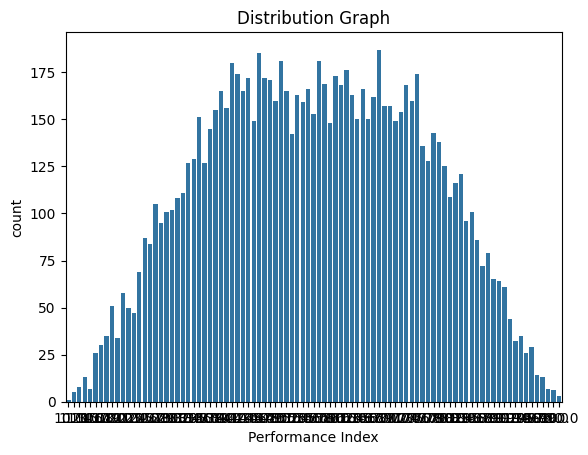

In [57]:
sns.countplot(data=data,x="Performance Index")
plt.title("Distribution Graph")
plt.show()

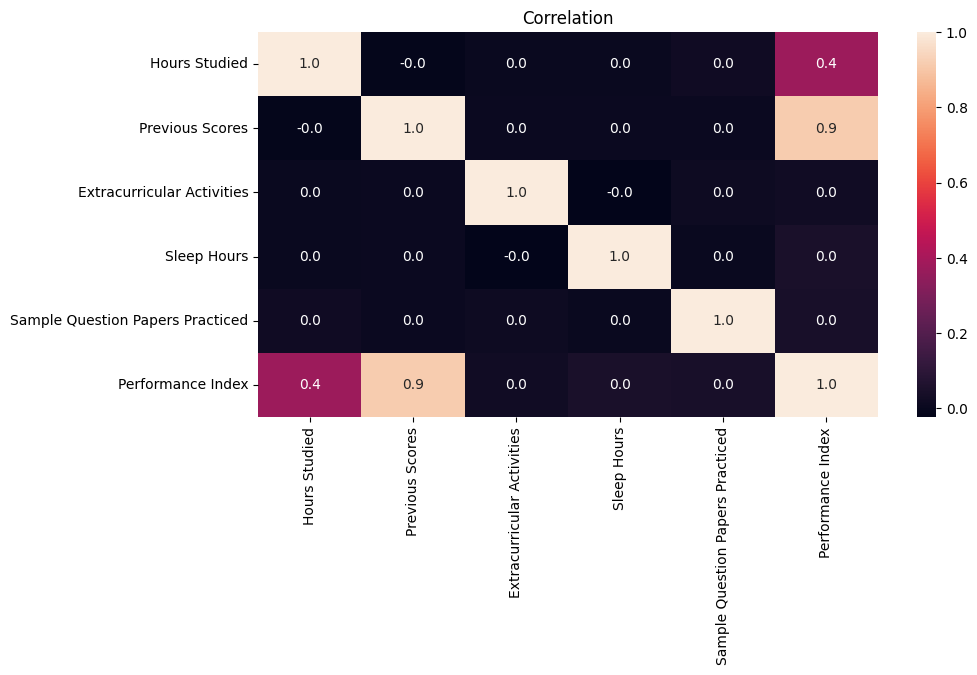

In [58]:
plt.figure(figsize=(10,5))
c=data.corr(numeric_only=True)
sns.heatmap(c,annot=True,fmt=".1f")
plt.title("Correlation")
plt.show()

In [59]:
target_corr=corr_matrix["Performance Index"].sort_values(ascending=False)
print(target_corr)


Performance Index                   1.000000
Previous Scores                     0.915189
Hours Studied                       0.373730
Sleep Hours                         0.048106
Sample Question Papers Practiced    0.043268
Extracurricular Activities          0.024525
Name: Performance Index, dtype: float64


In [60]:
data

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,1,4,2,23.0
9996,7,64,1,8,5,58.0
9997,6,83,1,8,5,74.0
9998,9,97,1,7,0,95.0


In [61]:
X=data.drop("Performance Index",axis=1)
y=data["Performance Index"]

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)


In [64]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [65]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(
    n_neighbors=5,
    metric='euclidean'
)

knn.fit(x_train_scaled, y_train)


KNeighborsRegressor(metric='euclidean')

In [66]:
y_train_pred = knn.predict(x_train_scaled)
y_test_pred = knn.predict(x_test_scaled)


In [67]:
from sklearn.metrics import  mean_squared_error,mean_absolute_error, r2_score
train_mae=mean_absolute_error(y_train,y_train_pred)
test_mae=mean_absolute_error(y_test,y_test_pred)
train_r2=r2_score(y_train,y_train_pred)
test_r2=r2_score(y_test,y_test_pred)
print("Training MAE: ",train_mae)
print("Testing MAE: ",test_mae)
print("Training R2: ",train_r2)
print("Testing MAE: ",test_r2)

Training MAE:  1.94445
Testing MAE:  2.3581000000000003
Training R2:  0.9840199024193306
Testing MAE:  0.9768944309139496


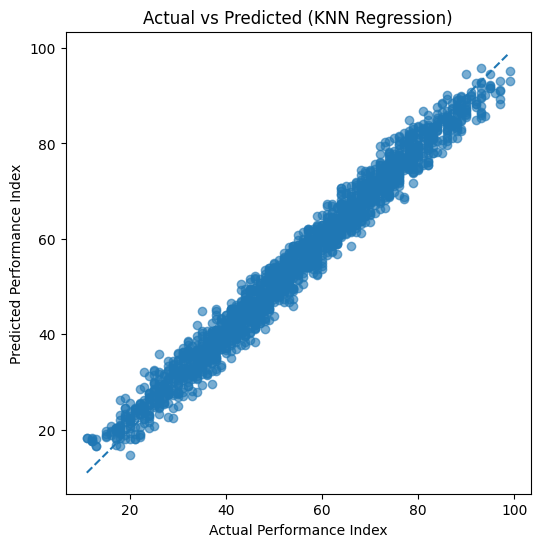

In [68]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_test_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         linestyle='--')
plt.xlabel("Actual Performance Index")
plt.ylabel("Predicted Performance Index")
plt.title("Actual vs Predicted (KNN Regression)")
plt.show()


In [75]:
from sklearn.model_selection import GridSearchCV
# DOING IT Hypertuning k trying to 1 to 20
#  uses (CV) 5 fold cross validation
# Evaluates each K using R² score
param_grid = {'n_neighbors': range(1, 21)}

grid = GridSearchCV(
    KNeighborsRegressor(),
    param_grid,
    cv=5,
    scoring='r2'
)

grid.fit(x_train_scaled, y_train)

print("Best K:", grid.best_params_)
print("Best CV R2:", grid.best_score_)

Best K: {'n_neighbors': 18}
Best CV R2: 0.9763768054638986


In [70]:
results = grid.cv_results_

k_values = results['param_n_neighbors'].data.astype(int)
mean_r2 = results['mean_test_score']
std_r2 = results['std_test_score']

In [77]:
print(k_values)
print(mean_r2)
print(std_r2)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
[0.95184484 0.96673007 0.97137784 0.97306339 0.97391103 0.97477613
 0.97522981 0.97536656 0.97572196 0.9758837  0.97604076 0.97619954
 0.97627344 0.97635736 0.97633285 0.97633762 0.9763661  0.97637681
 0.97637292 0.97632369]
[0.00228166 0.00119732 0.00134268 0.00134719 0.00109092 0.00117114
 0.00110242 0.0010858  0.00122281 0.00111528 0.00102935 0.00110874
 0.00102038 0.00095997 0.0009904  0.00089692 0.00085411 0.00084842
 0.00092063 0.0009364 ]


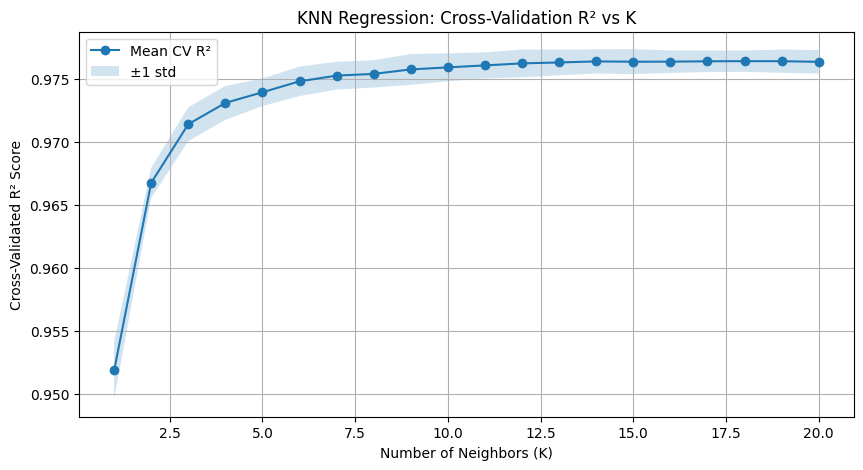

In [76]:
results = grid.cv_results_

k_values = results['param_n_neighbors'].data.astype(int)
mean_r2 = results['mean_test_score']
std_r2 = results['std_test_score']

plt.figure(figsize=(10,5))
plt.plot(k_values, mean_r2, marker='o', label='Mean CV R²')
plt.fill_between(
    k_values,
    mean_r2 - std_r2,
    mean_r2 + std_r2,
    alpha=0.2,
    label='±1 std'
)

plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Cross-Validated R² Score")
plt.title("KNN Regression: Cross-Validation R² vs K")
plt.legend()
plt.grid(True)
plt.show()


In [72]:
best_k = grid.best_params_['n_neighbors']

final_knn = KNeighborsRegressor(n_neighbors=best_k)
final_knn.fit(x_train_scaled, y_train)


KNeighborsRegressor(n_neighbors=18)

In [73]:
y_train_pred = final_knn.predict(x_train_scaled)
y_test_pred = final_knn.predict(x_test_scaled)


In [74]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("Training MAE:", mean_absolute_error(y_train, y_train_pred))
print("Testing MAE:", mean_absolute_error(y_test, y_test_pred))

print("Training R2:", r2_score(y_train, y_train_pred))
print("Testing R2:", r2_score(y_test, y_test_pred))


Training MAE: 2.155381944444444
Testing MAE: 2.302694444444444
Training R2: 0.9798063705656384
Testing R2: 0.9774222783610322


In [78]:
# now going wiht the classification

In [81]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [87]:
df["Extracurricular Activities"] = df["Extracurricular Activities"].map({
    "Yes": 1,
    "No": 0
})

In [88]:
df["Result"] = (df["Performance Index"] >= 70).astype(int)

In [89]:
print(df["Result"].value_counts())


Result
0    7346
1    2654
Name: count, dtype: int64


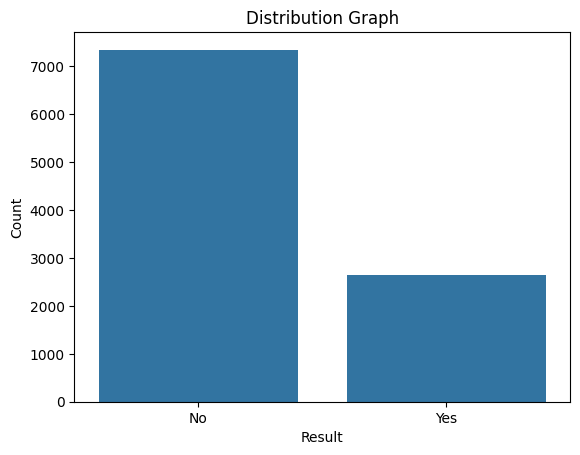

In [94]:
sns.countplot(data=df,x="Result")
plt.title("Distribution Graph")
plt.xlabel("Result")
plt.ylabel("Count")
plt.xticks([0,1],['No','Yes'])
plt.show()

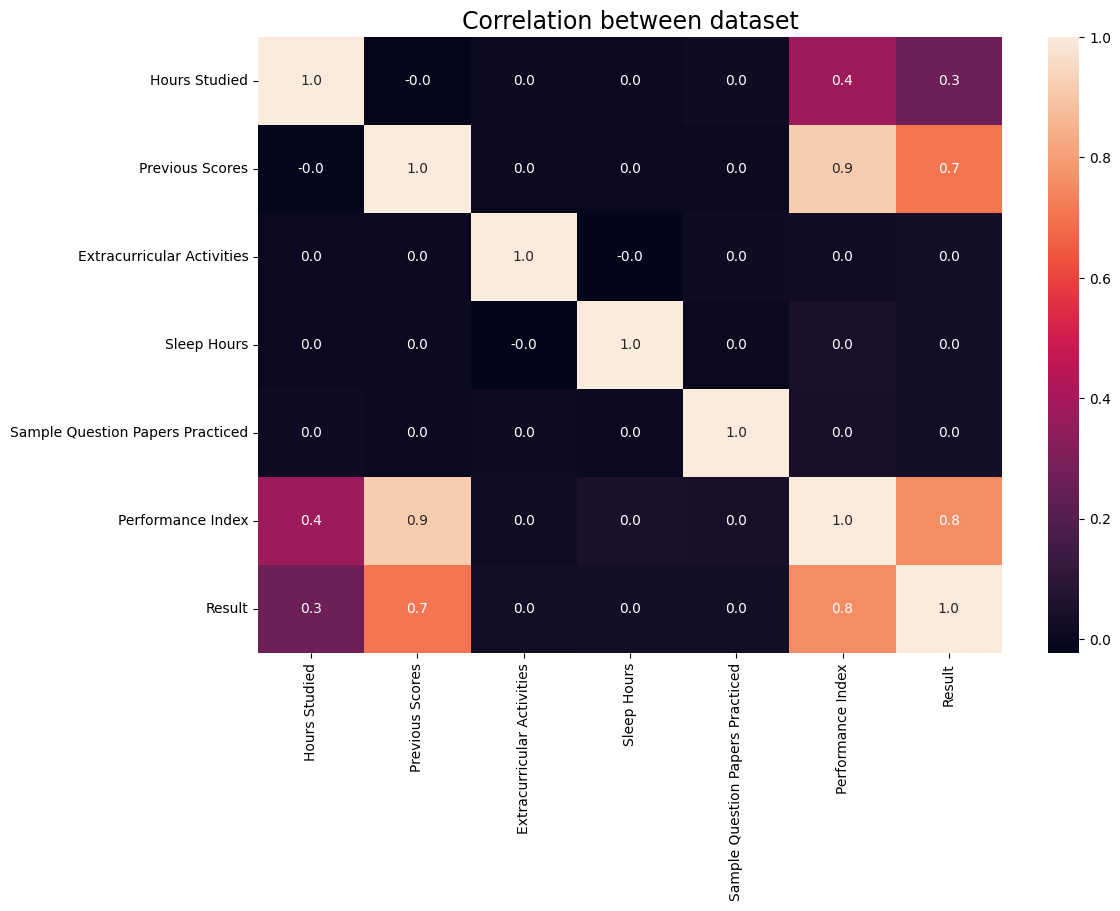

In [101]:
# Correlation heatmap
plt.figure(figsize=(12,8))
c=df.corr(numeric_only=True)
sns.heatmap(c,annot=True,fmt=".1f")
plt.title("Correlation between dataset",fontsize=17,c="k")
plt.show()

In [95]:
X = data.drop(["Performance Index", "Result"], axis=1)
y = data["Result"]


In [99]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2,stratify=y)

In [107]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

In [111]:
pipeline=Pipeline([
    ('scaler',StandardScaler()),
    ('knn',KNeighborsClassifier(n_neighbors=3))
])
pipeline.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=3))])

In [112]:
y_train_pred=pipeline.predict(X_train)
y_test_pred=pipeline.predict(X_test)

In [123]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay

In [114]:
training_acc=accuracy_score(y_train,y_train_pred)
test_acc=accuracy_score(y_test,y_test_pred)

In [116]:
print("Training Score: ",training_acc)
print("Accuracy Score: ",test_acc)

Training Score:  0.977375
Accuracy Score:  0.954


In [118]:
y_pred_prob=pipeline.predict_proba(x_test)[:,1]


In [119]:
results_df = pd.DataFrame({
    'Actual Label': y_test,
    'Predicted Label': y_test_pred,
    'Predicted Probability': y_pred_prob
})

results_df.head()

,Actual Label,Predicted Label,Predicted Probability
5059,0,0,0.0
1572,0,0,0.0
4136,0,0,0.0
1240,0,0,0.0
8583,0,0,0.0


In [120]:
len(results_df[(results_df["Actual Label"] == 1) & (results_df["Predicted Label"] == 1)])

481

In [121]:
conf_matrix=confusion_matrix(y_test,y_test_pred)
print("Confusion MAtrix")
print(conf_matrix)

Confusion MAtrix
[[1427   42]
 [  50  481]]


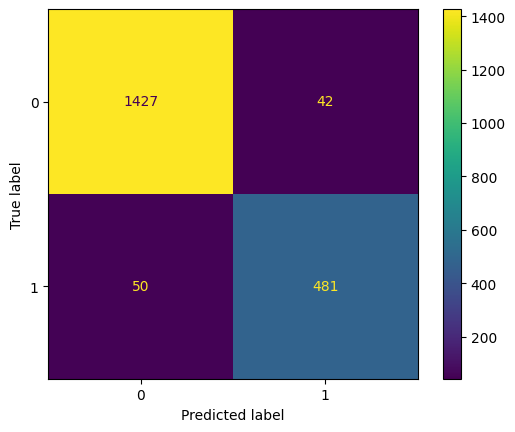

In [125]:
dis=ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
dis.plot()
plt.show()


In [127]:
# Print classification report
print("\t\tK-Nearest Neighbors Classification Report:")
print(classification_report(y_test, y_test_pred))

		K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1469
           1       0.92      0.91      0.91       531

    accuracy                           0.95      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.95      0.95      0.95      2000



In [135]:
from sklearn.metrics import roc_auc_score,roc_curve,auc
fpr,tpr,thresholds=roc_curve(y_test,y_test_pred)
roc_auc=auc(fpr,tpr)
youden_j=tpr-fpr
optimal_threshold_index=np.argmax(youden_j)
optimal_threshold=thresholds[optimal_threshold_index]
print(f"Optimal Threshold: {optimal_threshold:.4f}")

Optimal Threshold: 1.0000


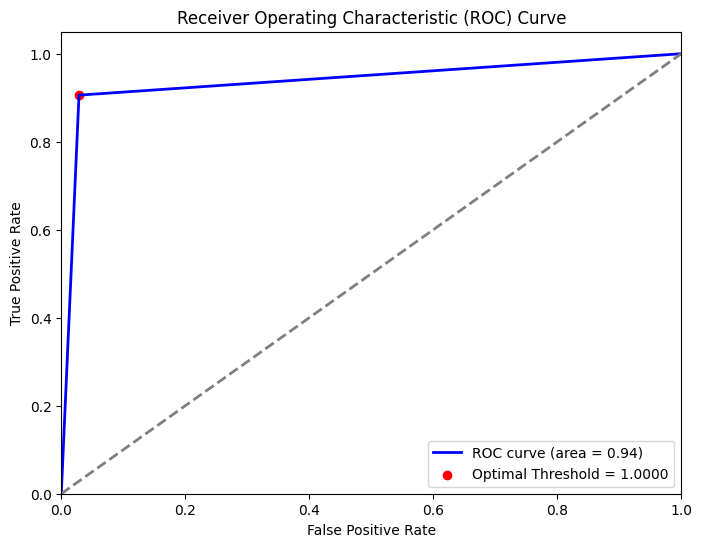

In [136]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.scatter(fpr[optimal_threshold_index], tpr[optimal_threshold_index], color='red', marker='o', label=f'Optimal Threshold = {optimal_threshold:.4f}')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [152]:
from sklearn.model_selection import GridSearchCV

In [164]:
param_grid = {'knn__n_neighbors': np.arange(1, 21)}

In [165]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),    # Standardize the data
    ('knn', KNeighborsClassifier())  # KNN classifier
])

In [166]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)



GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])},
             scoring='accuracy')

In [167]:
optimal_k = grid_search.best_params_['knn__n_neighbors']
print(f"The optimal number of neighbors is {optimal_k}")


The optimal number of neighbors is 16


In [168]:
best_score = grid_search.best_score_
print(f"The best cross-validated accuracy is {best_score}")


The best cross-validated accuracy is 0.9621250000000001


In [169]:
cv_results = grid_search.cv_results_

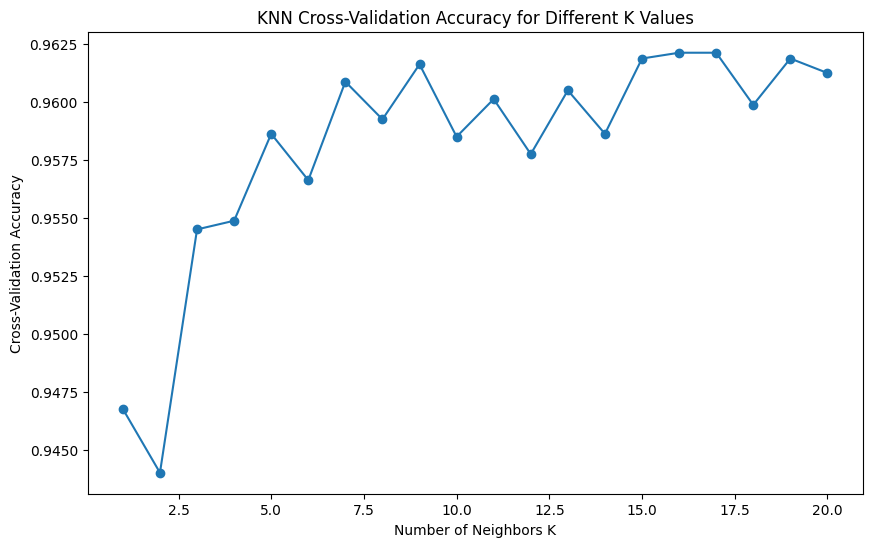

In [172]:
plt.figure(figsize=(10, 6))
plt.plot(param_grid['knn__n_neighbors'], cv_results['mean_test_score'], marker='o')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Cross-Validation Accuracy')
plt.title('KNN Cross-Validation Accuracy for Different K Values')
plt.show()